In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Linear Regression
A foundational algorithm in data science, plays a pivotal role in predicting continuous outcomes. It predicts the relationship between two variables by assuming a **linear connection** between the **independent** and **dependent variables**. It seeks the optimal line that minimizes the sum of squared differences between predicted and actual values. Applied in various domains like economics and finance, this method analyzes and forecasts data trends. It can extend to multiple linear regression involving several independent variables and logistic regression, suitable for binary classification problems.

Any ML models follow this work flow:<br>
Data --> Model --> Cost function (J) --> Optimization of J

## Simple Linear Regression
In a simple linear regression, there is **one independent variable (x)** and **one dependent variable (y)**. The model estimates the **slope** and **intercept** of the line of best fit, which represents the relationship between the variables. The slope represents the change in the dependent variable for each unit change in the independent variable, while the intercept represents the predicted value of the dependent variable when the independent variable is zero.

**MODEL**<br>
To claculate the best-fit line, linear regression uses the traditional **slope-intercept** form of a line:<br>
**`Y = W*X + b`**<br>
where Y = Dependent variable, X = Independent variable, W = Slope, b = constant/Intercept.

!()["Images/LR1.jpg"]

**COST FUNCTION (J)**<br>
The goal of the linear regression algorithm is to get the best values for B0 and B1 to find the best fit line. The best fit line is a line that has the least error which means the error between predicted values and actual values should be minimum.

**1. Random Error :-** In regression, the difference between the observed value of the dependent variable(yi) and the predicted value(predicted) is called the **residuals** or **random error**.<br>
**`error = Ypredicted - Yi`**<br>
Where Ypredicted = W*X + b.<br>
The best fit line is a line that fits the given scatter plot in the best way. Mathematically, the best fit line is obtained by minimizing the Residual Sum of Squares(RSS).

The Cost Function helps to work out the optimal values for **W** and **b**, which provides the best fit line for the data points.<br>
**NOTE -->** The cost function should be **continuous, differentiable** and **convex** in nature.<br>
In linear regression, Mean Squared Error (MSE) is used which is the average of squared error that occurred between the Ypredicted and Yi.
!()["Images/LR2.png"]

**GRADIENT DESCENT**<br>
Gradient Descent is one of the optimization algorithms that optimize the cost function to reach the **optimal minimal solution**. To find the optimum solution we need to reduce the cost function(MSE) for all data points. This is done by updating the values of W and b iteratively until we get an optimal solution.<br>
A regression model optimizes the gradient descent algorithm to update the coefficients of the line by reducing the cost function by randomly selecting coefficient values and then iteratively updating the values to reach the minimum cost function.<br>
!()["Images/LR3.jpeg"]
As our cost function is a convex function, it should have one global minima and to reach there we need to take some steps. Now if we take small steps it will take a lot of time to reach at the minima and if we take larger steps we will reach to the bottom sooner but there is a probability that we might overshoot. So in ML these steps are called as **Learning Rate** and this decides how fast the algorithm converges to the minima.
!()["Images/LR4.jpeg"]
Mathematically, we can reach the minima by derivating the equation and equating it with zero **(slope/gradient = 0)**. So we have to derivate the equation with respect to our parameters (W and b) so as to update the values of W and b.<br>

**Derivation of Gradient Descent**<br>
We will take gradient of cost funtion (J) by partial derivatives w.r.t W and b.
!()["Images/LR5.png"]
Here the partial derivates are the gradients, and they are used to update the values of W and b. Alpha is the learning rate.

### Evaluation Metrics for Linear Regression
The strength of any linear regression model can be assessed using various evaluation metrics. These evaluation metrics usually provide a measure of how well the observed outputs are being generated by the model.

**1. Coefficient of Determination or R-squared (R2)**<br>
R-Squared is a number that explains the amount of variation that is explained/captured by the developed model. It always ranges between 0 & 1 . Overall, the higher the value of R-squared, the better the model fits the data.
!()["Images/LR6.png"]
**Residual sum of Squares (RSS)** is defined as the sum of squares of the residual for each data point in the plot/data. It is the measure of the difference between the expected and the actual observed output.

**Total Sum of Squares (TSS)** is defined as the sum of errors of the data points from the mean of the response variable.

The significance of R-squared is shown by the following figures,
!()["Images/LR7.jpeg"]

**2. Root Mean Squared Error (RMSE) and Residual Standard Error (RSE)**<br>
The Root Mean Squared Error is the square root of the variance of the residuals. It specifies the absolute fit of the model to the data i.e. how close the observed data points are to the predicted values. Mathematically it can be represented as,
!()["Images/LR8.png"]
To make this estimate unbiased, one has to divide the sum of the squared residuals by the degrees of freedom rather than the total number of data points in the model. This term is then called the Residual Standard Error(RSE). Mathematically it can be represented as,
!()["Images/LR9.png"]
R-squared is a better measure than RSME. Because the value of Root Mean Squared Error depends on the units of the variables (i.e. it is not a normalized measure), it can change with the change in the unit of the variables.

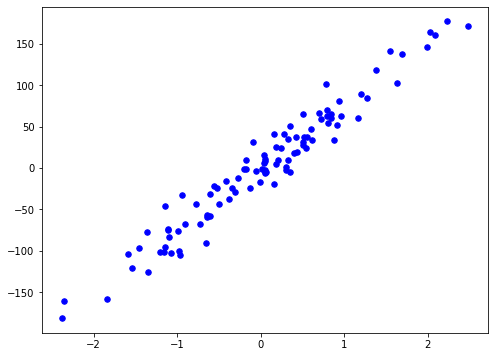

In [2]:
X,y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color="b", marker="o", s=30)
plt.show()

In [3]:
class LinearRegression() : 
    def __init__(self, lr = 0.002, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

        
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
        

In [4]:
reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print(pred)

[ 78.54854917  56.97250724 -39.30562456 -71.24576345  18.53386866
 -63.80986358 -12.58373962 132.00003755  12.52558037 -88.43591013
  13.87211111  36.47176313  23.10319338  33.44825999  32.80796982
 -32.06918773 -71.79709658  23.19090486  33.45744187  25.92418174]


In [5]:
mse = np.mean((y_test - pred)**2)
print(mse)

361.2812896055198


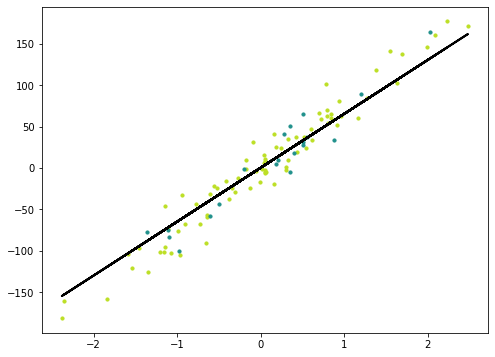

In [6]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()